<a href="https://colab.research.google.com/github/Mutai-Gilbert/Finessing-Data-Science/blob/dev/hypothesistesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from typing import Tuple
import math


In [ ]:
def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    """Returns mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma


In [ ]:
from typing import Callable

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    # Cumulative distribution function for the standard normal distribution
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

normal_probability_below: Callable[[float, float, float], float] = normal_cdf

def normal_probability_above(lo: float, mu: float = 0, sigma: float = 1) -> float:
    """The probability that an N(mu, sigma) is greater than lo."""
    return 1 - normal_cdf(lo, mu, sigma)

def normal_probability_between(lo: float, hi: float, mu: float = 0, sigma: float = 1) -> float:
    """The probability that an N(mu, sigma) is between lo and hi."""
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

def normal_probability_outside(lo: float, hi: float, mu: float = 0, sigma: float = 1) -> float:
    """The probability that an N(mu, sigma) is not between lo and hi."""
    return 1 - normal_probability_between(lo, hi, mu, sigma)


In [ ]:

def normal_upper_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """Returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """Returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float, mu: float = 0, sigma: float = 1) -> Tuple[float, float]:
    """Returns the symmetric (about the mean) bounds that contain the specified probability"""
    tail_probability = (1 - probability) / 2
    # Upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    # Lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound


In [ ]:
def normal_upper_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """Returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """Returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float, mu: float = 0, sigma: float = 1) -> Tuple[float, float]:
    """ Returns the symmetric (about the mean) bounds that contain the specified probability """
    tail_probability = (1 - probability) / 2
    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound


In [ ]:
def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
    """How likely are we to see a value at least as extreme as x (in either direction) if our values are from an N(mu, sigma)?"""
    if x >= mu:
        # x is greater than the mean, so the tail is everything greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # x is less than the mean, so the tail is everything less than x
        return 2 * normal_probability_below(x, mu, sigma)
    two_sided_p_value(529.5, mu, sigma)
    two_sided_p_value(531.5, mu_0, sigma_0)

In [ ]:
import random

extreme_value_count = 0
for _ in range(1000):
    num_heads = sum(1 if random.random() < 0.5 else 0 for _ in range(1000))  # Count # of heads in 1000 flips
    if num_heads >= 530 or num_heads <= 470:  # and count how often the # is 'extreme'
        extreme_value_count += 1

In [ ]:
from typing import List
import random

def run_experiment() -> List[bool]:
    """Flips a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment: List[bool]) -> bool:
    """Using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment for experiment in experiments if reject_fairness(experiment)])
assert num_rejections == 46


In [ ]:
def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma


In [ ]:
def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)
a_b_test_statistic(1000, 200, 1000, 180)

-1.1403464899034472

In [ ]:
import math

def B(alpha: float, beta: float) -> float:
    """A normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x: float, alpha: float, beta: float) -> float:
    if x <= 0 or x >= 1: # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)
    alpha / (alpha + beta)

In [ ]:
def B(alpha: float, beta: float) -> float:
    """A normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x: float, alpha: float, beta: float) -> float:
    if x <= 0 or x >= 1:  # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)
    alpha / (alpha + beta)

In [ ]:
from typing import Callable

def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x + h) - f(x)) / h


In [ ]:
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

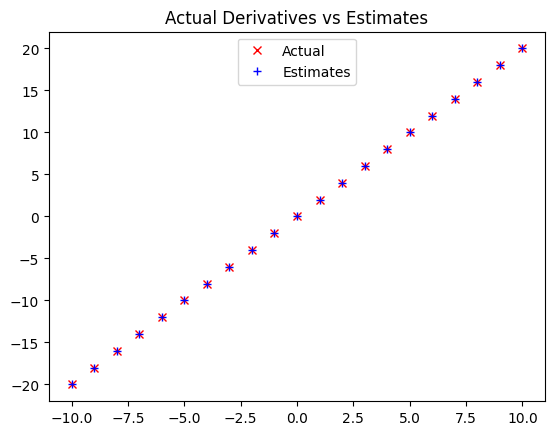

In [ ]:
import matplotlib.pyplot as plt

xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs]

plt.title("Actual Derivatives vs Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')

plt.plot(xs, estimates, 'b+', label='Estimates')
plt.legend(loc=9)
plt.show()


In [7]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')
def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
  batch_starts = [start for start in range(0, len(dataset), batch_size)]
  if shuffle: random.shuffle(batch_starts)
  for start in batch_starts:
    end = start + batch_size
    yield dataset[start:end]

In [9]:
from typing import Tuple, List

def linear_gradient(x: float, y: float, theta: Tuple[float, float]) -> List[float]:
    slope, intercept = theta
    predicted = slope * x + intercept  # The prediction of the model.
    error = predicted - y  # error is (predicted - actual).
    squared_error = error ** 2  # We'll minimize squared error
    grad = [2 * error * x, 2 * error]  # using its gradient.
    return grad
